# `Exploratory Data Analysis`

In [53]:
# Libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import pickle as pkl
from sklearn.preprocessing import LabelEncoder 
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, ConfusionMatrixDisplay

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.regularizers import l2, l1

In [2]:
df = pd.read_csv('cleaned_titanic_data.csv')
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked,cabin_known
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,S,1
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,S,1
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,S,1
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,S,1
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,S,1


### `Univariate Analysis`

`1. Target Class Distribution`

survived
0    809
1    498
Name: count, dtype: int64
----------------


Text(0, 0.5, 'Count')

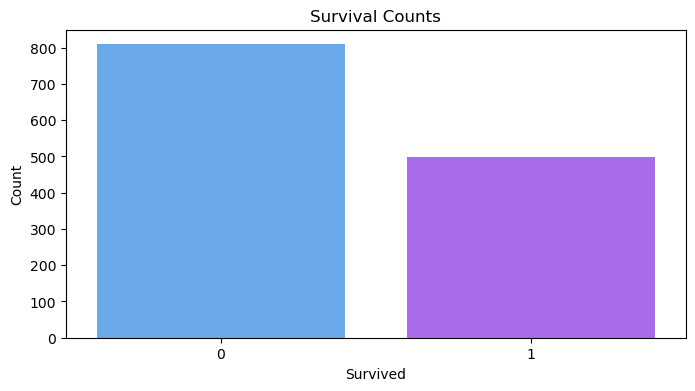

In [3]:
target_val_counts = df['survived'].value_counts() 
print(target_val_counts)
print('----------------')  
fig, ax = plt.subplots(figsize=(8,4))
sns.barplot(x=target_val_counts.index, y=target_val_counts.values, palette='cool', ax=ax)
ax.set_title('Survival Counts')
ax.set_xlabel('Survived')
ax.set_ylabel('Count')

`Most of the passengers did not survive, with 498 survivors, and 809 fatalities.`

`2. Sex`

Text(0, 0.5, 'Count')

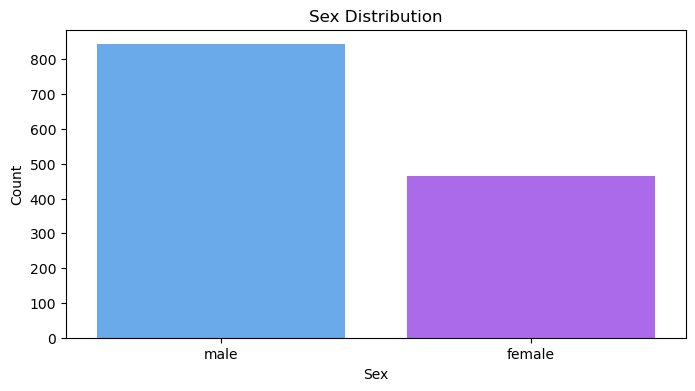

In [4]:
sex_value_counts = df['sex'].value_counts()
fig, ax = plt.subplots(figsize=(8,4))
sns.barplot(x=sex_value_counts.index, y=sex_value_counts.values, palette='cool', ax=ax)
ax.set_title('Sex Distribution')
ax.set_xlabel('Sex')
ax.set_ylabel('Count')

`There were more males than females in the ship.`

`3. Parent / Children`

Text(0, 0.5, 'Count')

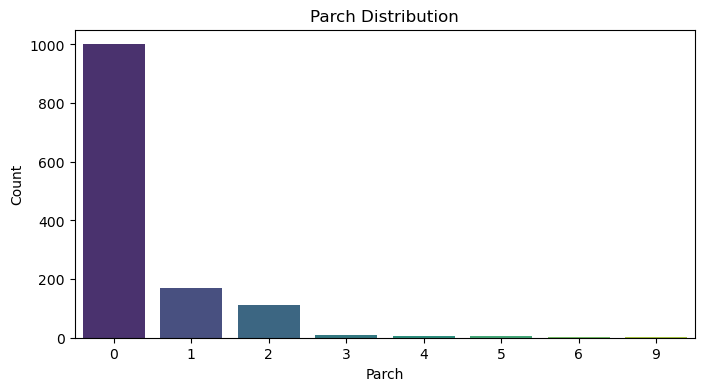

In [5]:
parch_value_counts = df['parch'].value_counts()
fig, ax = plt.subplots(figsize=(8,4))
sns.barplot(x=parch_value_counts.index, y=parch_value_counts.values, palette='viridis', ax=ax)
ax.set_title('Parch Distribution')  
ax.set_xlabel('Parch')
ax.set_ylabel('Count')

`Most of the passengers didn't have a parent(s) or child(ren) with then in the ship. Others have family around 1 and 2 parents/children.`

`4. Sibling / Spouse`

Text(0, 0.5, 'Count')

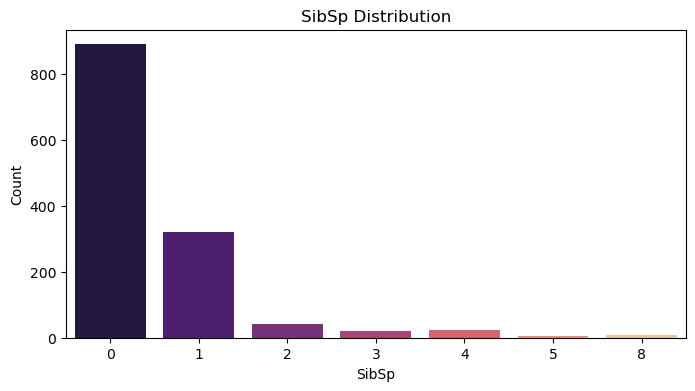

In [6]:
sibsp_value_counts = df['sibsp'].value_counts()
fig, ax = plt.subplots(figsize=(8,4))
sns.barplot(x=sibsp_value_counts.index, y=sibsp_value_counts.values, palette='magma')
ax.set_title('SibSp Distribution')
ax.set_xlabel('SibSp')
ax.set_ylabel('Count')

`Most of the passengers did not have a spouse or siblings in the ship.`

`5. Fare`

Text(0, 0.5, 'Frequency')

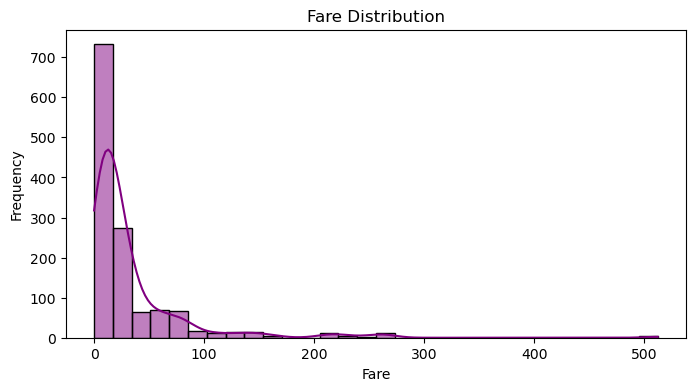

In [7]:
# Distribution of fare
figure, ax = plt.subplots(figsize=(8,4))
sns.histplot(df['fare'], bins=30, kde=True, color='purple', ax=ax)
ax.set_title('Fare Distribution')
ax.set_xlabel('Fare')   
ax.set_ylabel('Frequency')

`Most passengers paid fare ranging from 0 to 100 pounds (£).`

`6. Embarked`
- Represented by: C = Cherbourg, Q = Queenstown, and S = Southampton

Text(0, 0.5, 'Count')

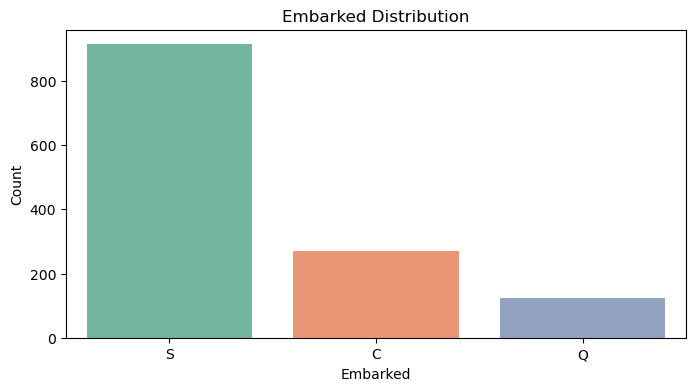

In [8]:
embarked_value_counts = df['embarked'].value_counts()
fig, ax = plt.subplots(figsize=(8,4))
sns.barplot(x=embarked_value_counts.index, y=embarked_value_counts.values, palette='Set2', ax=ax)
ax.set_title('Embarked Distribution')
ax.set_xlabel('Embarked')
ax.set_ylabel('Count')

`Most of the passengers embarked from Southampton, followed by Cherbourg, and lastly Queenstown.`

`7. Cabin Known / Unknown`

Text(0, 0.5, 'Count')

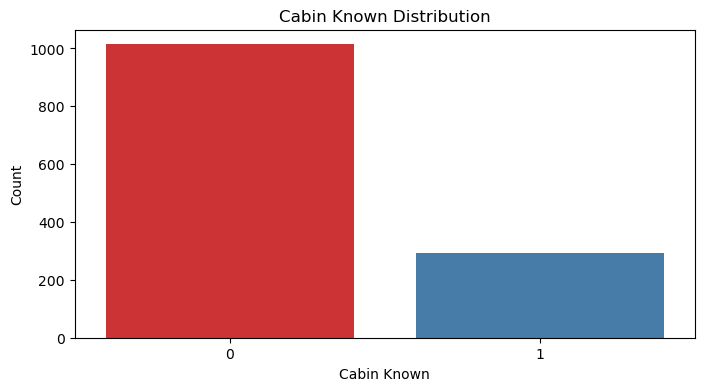

In [9]:
cabin_value_counts = df['cabin_known'].value_counts()
fig, ax = plt.subplots(figsize=(8,4))
sns.barplot(x=cabin_value_counts.index, y=cabin_value_counts.values, palette='Set1', ax=ax)
ax.set_title('Cabin Known Distribution')
ax.set_xlabel('Cabin Known')
ax.set_ylabel('Count')

`The cabin of most passengers remains unknown.`

### `Bivariate Analysis`

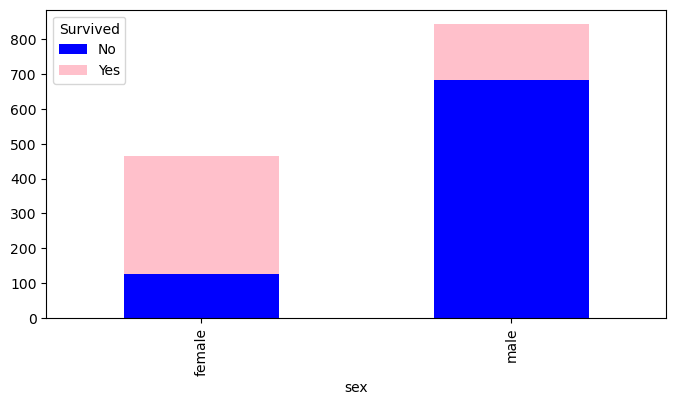

In [10]:
# Survivors based on sex
sex_survival = df.groupby(['sex'])['survived'].value_counts().unstack()
sex_survival.plot(kind='bar', stacked=True, figsize=(8,4), color=['blue', 'pink'])
plt.legend(title='Survived', labels=['No', 'Yes'])

`More female passengers survived compared to male passengers.`

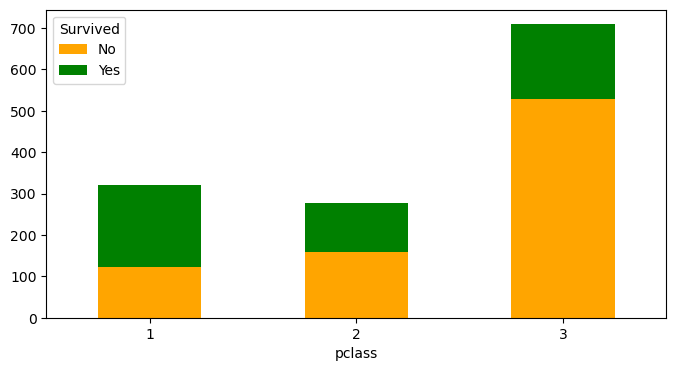

In [11]:
# Survival based on class
class_survival = df.groupby(['pclass'])['survived'].value_counts().unstack()
class_survival.plot(kind='bar', stacked=True, figsize=(8,4), color=['orange', 'green'])
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.tick_params(axis='x', rotation=360)

`More than half of the passengers in the upper class survived, which is not the case in the other classes, where most of the passengers did not survive.`

### `Multivariate ANalysis`

In [12]:
features = ['age', 'pclass', 'survived', 'sex', 'sibsp', 'parch', 'fare', 'embarked', 'cabin_known']
final_df = df[features]

In [63]:
df.head(3)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked,cabin_known
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,S,1
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,S,1
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,S,1


In [62]:
df['sex'].replace({'male': 1, 'female': 0})

0       0
1       1
2       0
3       1
4       0
       ..
1302    0
1303    0
1304    1
1305    1
1306    1
Name: sex, Length: 1307, dtype: int64

In [65]:
final_df.head(3)

,age,pclass,survived,sex,sibsp,parch,fare,embarked,cabin_known
0,29.00,1,1,0,0,0,211.3375,2,1
1,0.92,1,1,1,1,2,151.5500,2,1
2,2.00,1,0,0,1,2,151.5500,2,1


In [13]:
# Feature engineering for object columns
le = LabelEncoder()
final_df['sex'] = le.fit_transform(final_df['sex'])
final_df['embarked'] = le.fit_transform(final_df['embarked'])

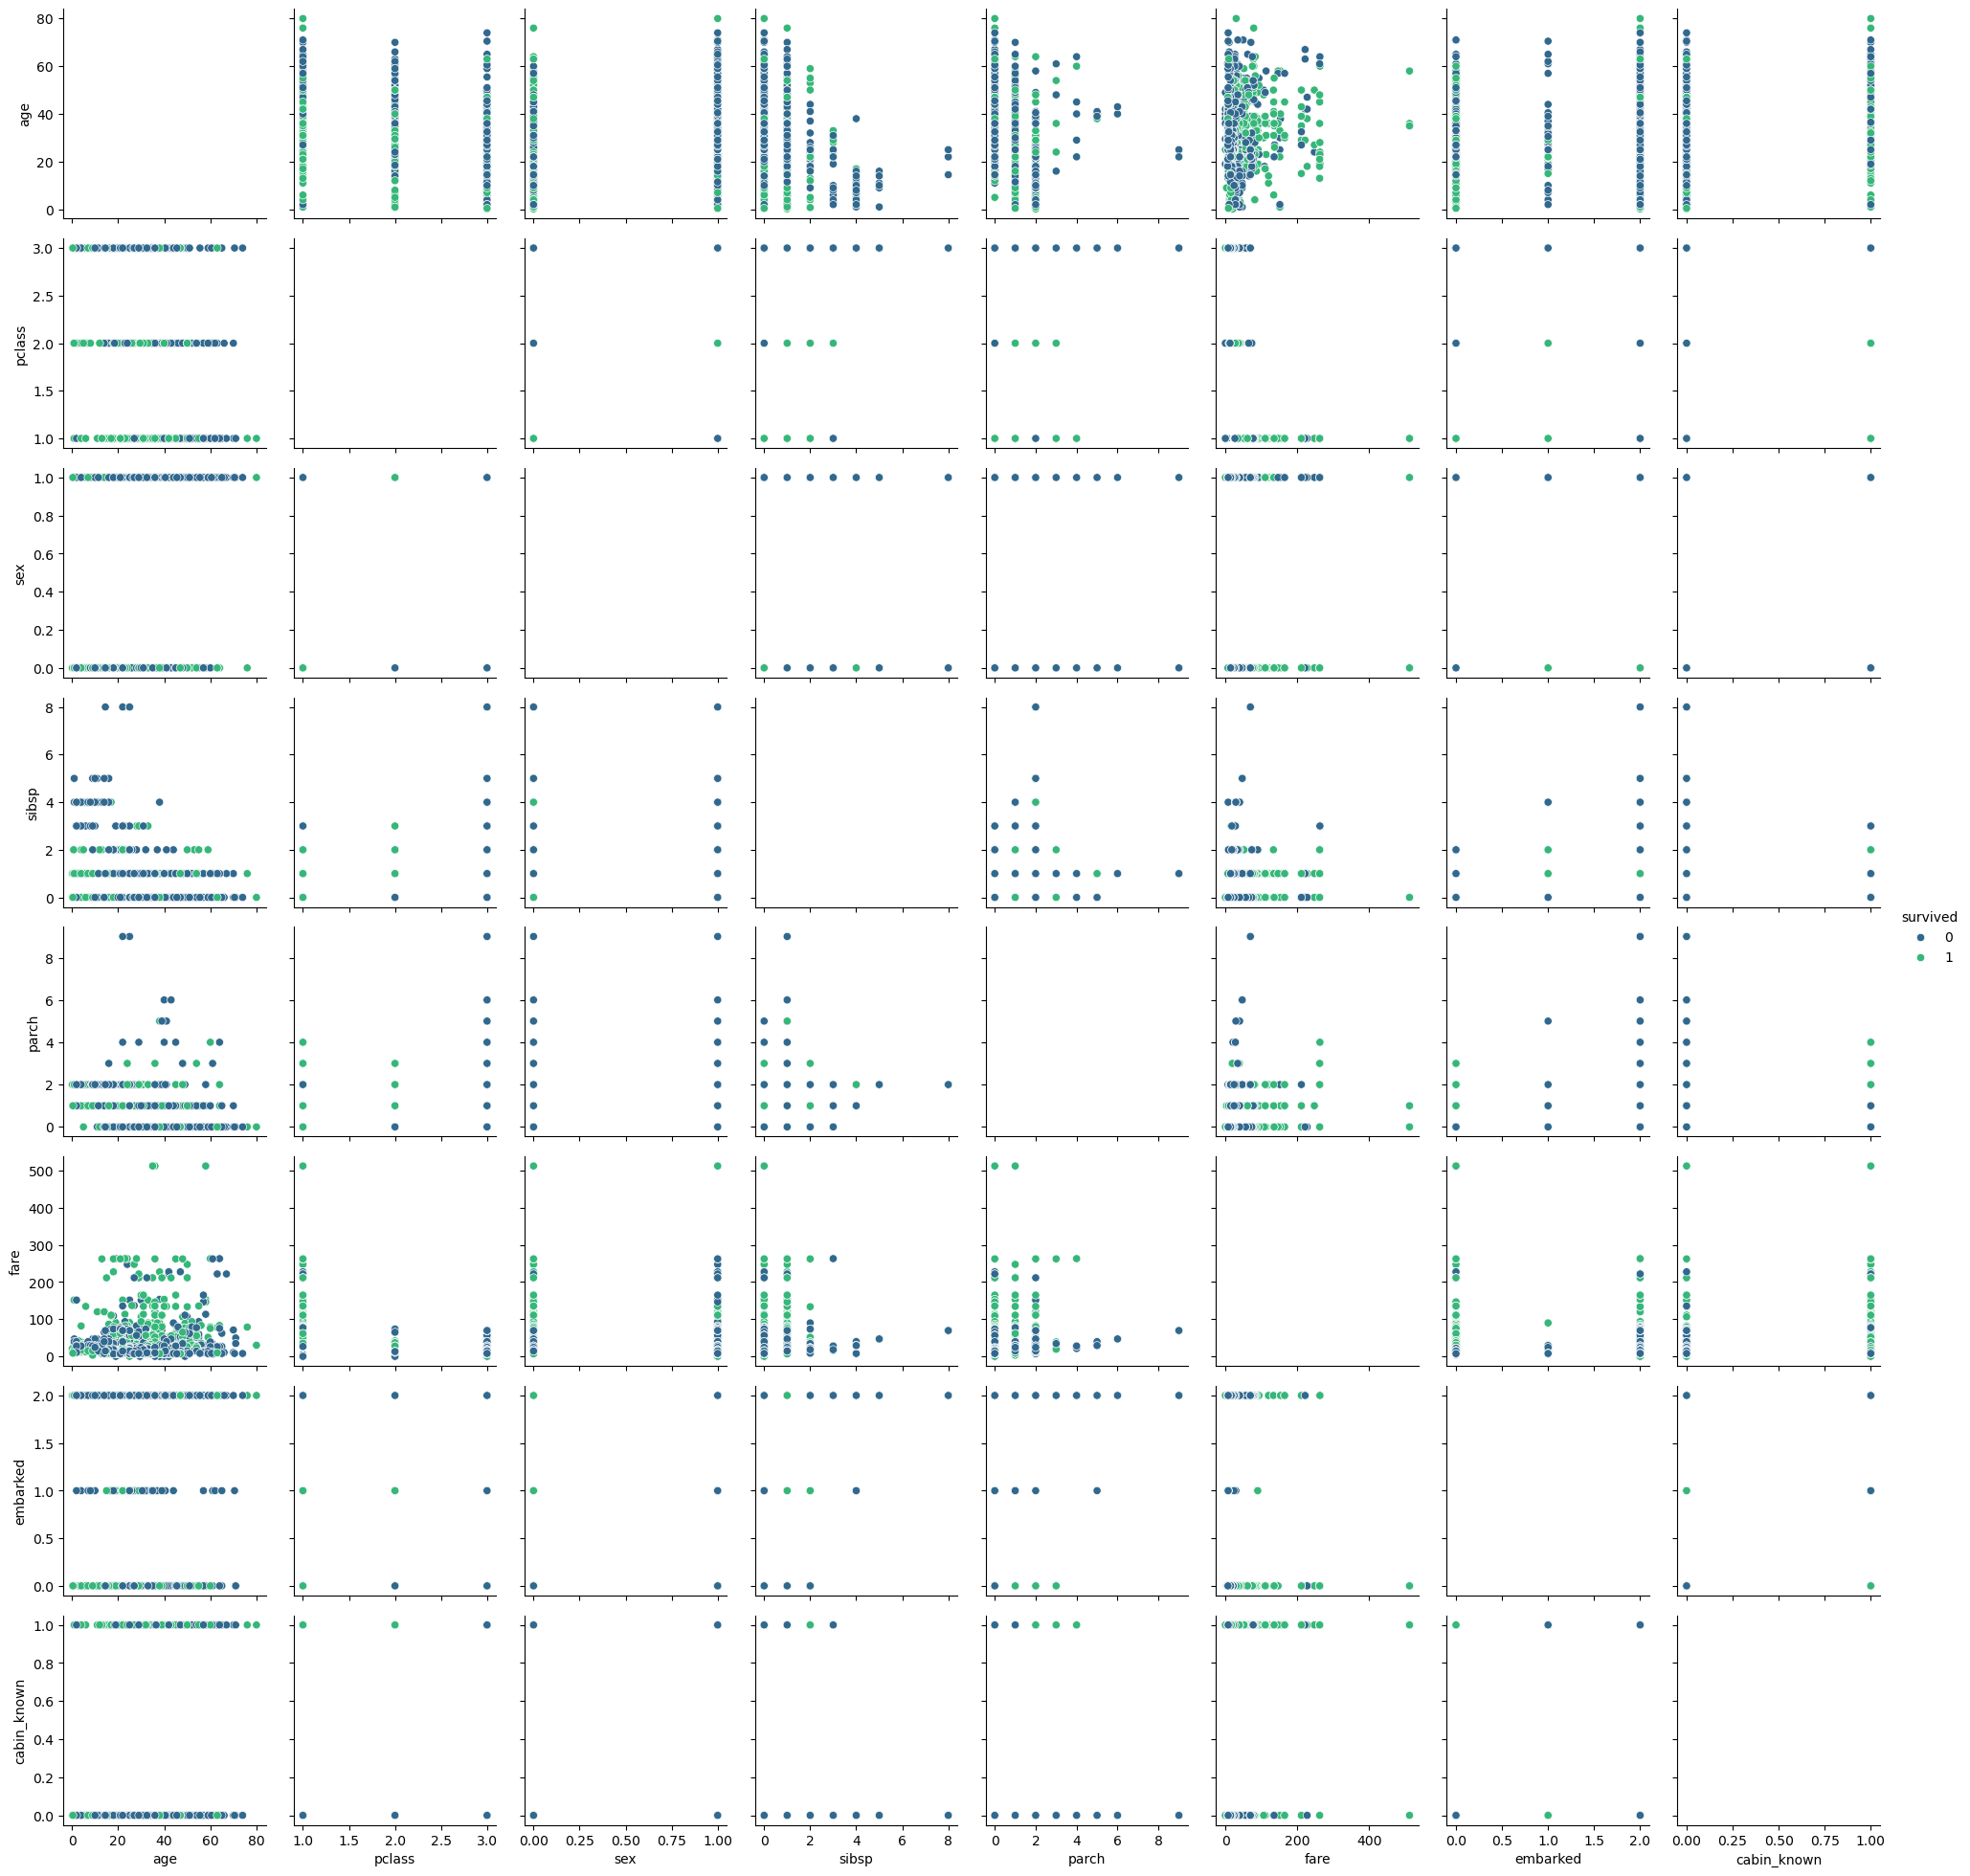

In [14]:
sns.PairGrid(final_df, hue='survived', palette='viridis').map_diag(sns.scatterplot).map_offdiag(sns.scatterplot).add_legend()

### `Data Preprocessing`

In [15]:
X = final_df.drop('survived', axis=1)
y = final_df['survived']

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.2, 
                                                    random_state=42)

### `Modelling`

`1. Logistic Regression`

In [16]:
def model_classifier(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    test_pred = model.predict(X_test)
    
    print("Train Accuracy:", accuracy_score(y_train, model.predict(X_train)))
    print("Test Accuracy:", accuracy_score(y_test, test_pred))

    cm = confusion_matrix(y_test, test_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot(cmap='Blues')

Train Accuracy: 0.7980861244019138
Test Accuracy: 0.7748091603053435


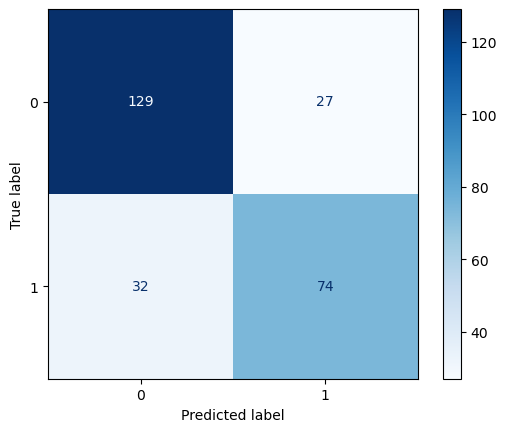

In [17]:
model_classifier(LogisticRegression(), X_train, y_train, X_test, y_test)

`The logistic regression model is slightly overfitting.`

`2. SVM`

Train Accuracy: 0.6861244019138756
Test Accuracy: 0.6450381679389313


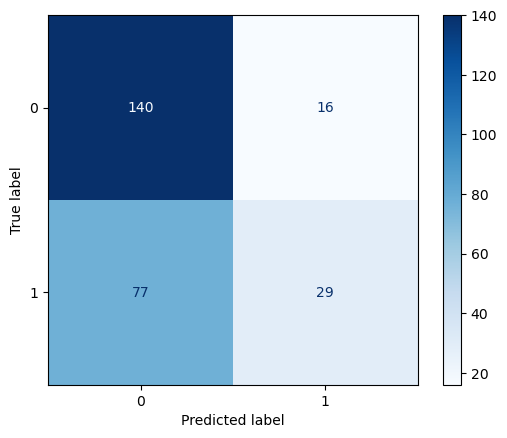

In [18]:
model_classifier(SVC(), X_train, y_train, X_test, y_test)

`3. KNN`

Train Accuracy: 0.7961722488038278
Test Accuracy: 0.6412213740458015


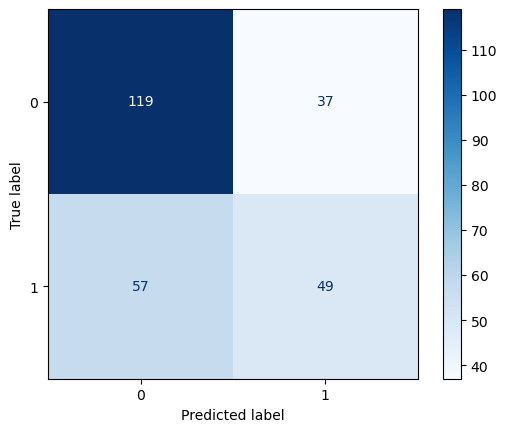

In [19]:
model_classifier(KNeighborsClassifier(n_neighbors=5), X_train, y_train, X_test, y_test)

`4. Decision Tree`

Train Accuracy: 0.9741626794258373
Test Accuracy: 0.7175572519083969


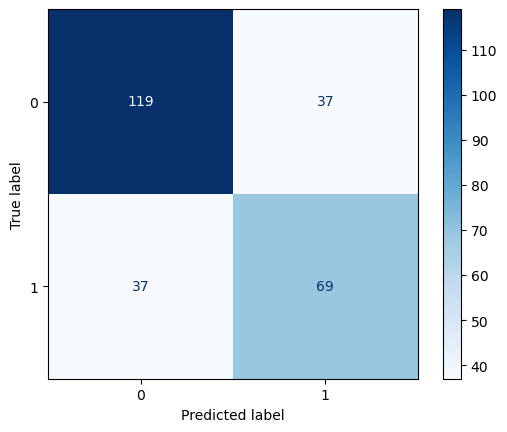

In [20]:
model_classifier(DecisionTreeClassifier(random_state=42), X_train, y_train, X_test, y_test)

`5. Random Forest`

Train Accuracy: 0.9732057416267943
Test Accuracy: 0.7442748091603053


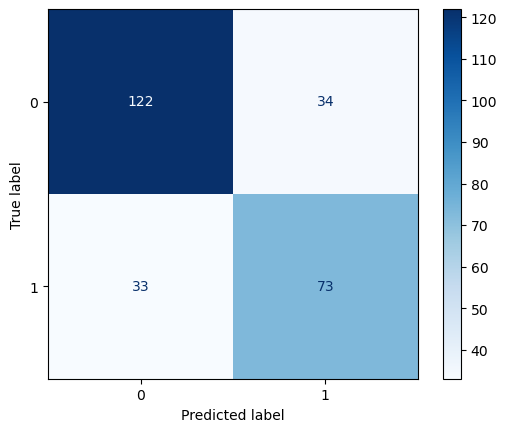

In [21]:
model_classifier(RandomForestClassifier(random_state=42), X_train, y_train, X_test, y_test)

`6. Sequential Model`

In [22]:
nn_model = Sequential([
    Dense(32, activation='relu', kernel_regularizer=l1(0.01),input_shape=(X_train.shape[1],)),
    Dropout(0.2),
    Dense(16, activation='relu', kernel_regularizer=l1(0.01)),   
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

nn_model.compile(
    optimizer='rmsprop',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

results = nn_model.fit(
    X_train,
    y_train,
    epochs=30,
    batch_size=32,
    validation_data=(X_test, y_test)
)

Epoch 1/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.5828 - loss: 2.4143 - val_accuracy: 0.5916 - val_loss: 1.9948
Epoch 2/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5923 - loss: 2.0620 - val_accuracy: 0.6221 - val_loss: 1.7938
Epoch 3/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6105 - loss: 1.7945 - val_accuracy: 0.6221 - val_loss: 1.6309
Epoch 4/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6144 - loss: 1.6402 - val_accuracy: 0.6298 - val_loss: 1.4940
Epoch 5/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6344 - loss: 1.4896 - val_accuracy: 0.6374 - val_loss: 1.3695
Epoch 6/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6344 - loss: 1.3438 - val_accuracy: 0.6336 - val_loss: 1.2824
Epoch 7/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6421 - loss: 1.2374 - val_accuracy: 0.6336 - val_loss: 1.1814
Epoch 8/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6507 - loss: 1.1633 - val_accuracy: 0.6718 - val_loss

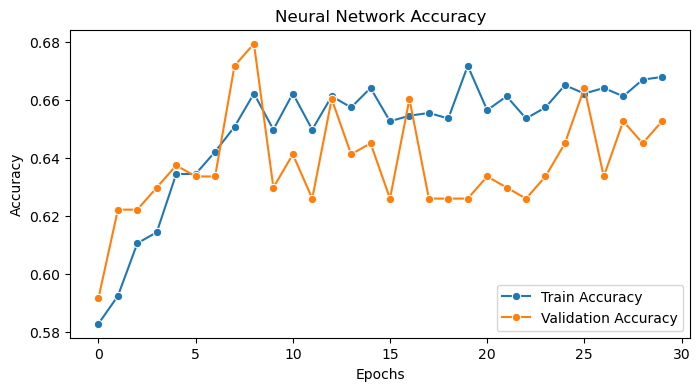

In [23]:
accuracy = results.history['accuracy']
val_accuracy = results.history['val_accuracy']
epochs = nn_model.history.epoch

figure, ax = plt.subplots(figsize=(8,4))
sns.lineplot(x=epochs, y=accuracy, label='Train Accuracy', marker='o', ax=ax)
sns.lineplot(x=epochs, y=val_accuracy, label='Validation Accuracy', marker='o', ax=ax)
ax.set_title('Neural Network Accuracy')
ax.set_xlabel('Epochs')
ax.set_ylabel('Accuracy')
ax.legend()

### `Best Model`

`The Random Forest baseline is performing better thet the other models`

Train Accuracy: 0.9732057416267943
Test Accuracy: 0.7442748091603053


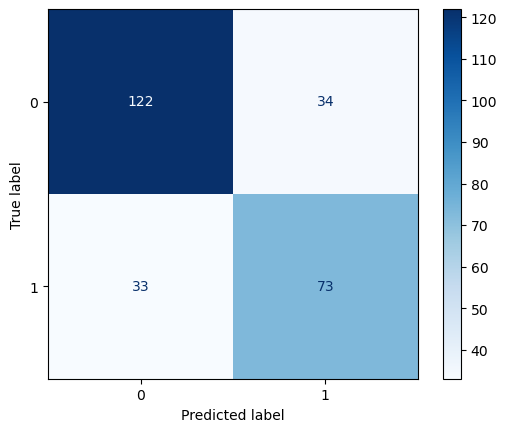

In [24]:
model_classifier(RandomForestClassifier(random_state=42), X_train, y_train, X_test, y_test)

`Hyperparameter Tuning`

In [50]:
# Grid search for Random Forest
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42), 
                           param_grid=param_grid, 
                           cv=5)

grid_search.fit(X_train, y_train)
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}


Train Accuracy: 0.9014354066985646
Test Accuracy: 0.7824427480916031


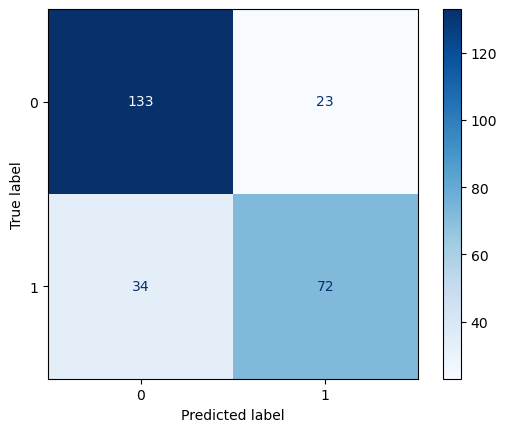

In [51]:
# Model with best parameters
best_rf = grid_search.best_estimator_
model_classifier(best_rf, X_train, y_train, X_test, y_test)

In [54]:
# Save the best model
with open('my_model.pkl', 'wb') as f:
    pkl.dump(best_rf, f)

`Testing`

`Model inputs:` 
- 'age'
- 'pclass', 
- 'sex'
- 'sibsp' 
- 'parch'
- 'fare' 
- 'embarked'
- 'cabin_known'

`Model Output:`
- Whether the passenger is likely to survive or not

In [75]:
# User input for data
def get_user_input():
    age = int(input("Enter age: "))
    pclass = int(input("Enter class of passenger (1: First, 2: Second, 3: Third): "))
    sex = int(input("Enter sex (0: Female, 1: Male): "))
    sisp = int(input("Enter number of siblings/spouses aboard: "))
    parch = int(input("Enter number of parents/children aboard: "))
    fare = float(input("Enter fare: "))
    embarked = int(input("Enter embarked (0: C, 1: Q, 2: S) ~ C = Cherbourg, Q = Queenstown, and S = Southampton"))
    cabin_known = int(input("Is the cabin known? (0: No, 1: Yes): "))

    return [age, pclass, sex, sisp, parch, fare, embarked, cabin_known]

In [76]:
def prediction_model(data):
    # Load the saved model
    with open('my_model.pkl', 'rb') as f:
        model = pkl.load(f)

    params = [data]
    prediction = model.predict(params)
    return print("Predicted Survival:", "Yes" if prediction[0] == 1 else "No")


In [77]:
prediction_model(get_user_input())

Predicted Survival: Yes
